# 图像肤色检测算法

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/face.jpg'),cv2.COLOR_BGR2RGB)

In [8]:
def skin_detect(src):
    rgb = np.float64(src)
    dst = np.zeros_like(rgb)
    sum_all = np.sum(rgb)
    if sum_all == 0:
        return src.copy()
    
    sum_r = np.sum(rgb[:,:,0])
    sum_g = np.sum(rgb[:,:,1])
    sum_b = np.sum(rgb[:,:,2])
    
    sr = rgb[:,:,0]
    sg = rgb[:,:,1]
    sb = rgb[:,:,2]
    df_r = DataFrame(rgb[:,:,0] / sum_all)
    df_g = DataFrame(rgb[:,:,1] / sum_all)
    df_b = DataFrame(rgb[:,:,2] / sum_all)
    
    dst_r = dst[:,:,0]
    dst_g = dst[:,:,1]
    dst_b = dst[:,:,2]
    
    idx_1 = (df_r > 95.0 / sum_all)
    idx_2 = (df_r < (1 - 90.0 / sum_all))
    idx_3 = (df_g > 50.0 / sum_all)
    idx_4 = ((df_r - df_g) < 0.2)
    idx = idx_1 & idx_2 & idx_3 & idx_4
    
    dst_r[idx] = sr[idx]
    dst_g[idx] = sg[idx]
    dst_b[idx] = sb[idx]
    dst[:,:,0] = dst_r
    dst[:,:,1] = dst_g
    dst[:,:,2] = dst_b
    return cv2.convertScaleAbs(dst)

In [10]:
dst = skin_detect(src)

Text(0.5,1,'Skin Detect')

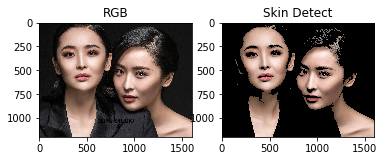

In [11]:
plt.subplot(121)
plt.imshow(src)
plt.title('RGB')
plt.subplot(122)
plt.imshow(dst)
plt.title('Skin Detect')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45008253